In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/diabetes.csv');

In [2]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('/content/diabetes.csv');

In [27]:
X=df.drop(columns='outcome',axis=1)
y=df['outcome']

In [28]:
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)

In [29]:
X=standardized_data
y=df['outcome']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [31]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

Accuracy: 0.7597402597402597
f1_score: 0.6021505376344086
precision_score: 0.717948717948718
recall_score: 0.5185185185185185


In [33]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[89 11]
 [26 28]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



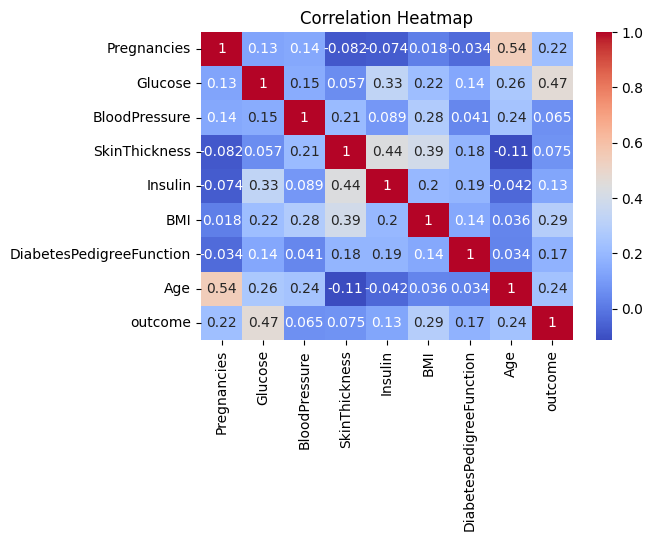

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()